<h3> Predicting whether a patient will survive the first year after lung cancer surgery - using machine learning. </h3>
<br>

  <ul>
    <li>Imports</li>
    <li>Load the dataset and Exploration</li>
    <li>Prepering data before modeling</li>
    <li>Modeling</li>
    <li>SVM</li>
    <li>Random Forest Classifer</li>
    <li>Cross Validation</li>
    <li>Summary</li>
  </ul>
<br><br>

<h3>1. Problem Definition</h3>
<br>

  <p>In this project, the problem that we will be investigating is binary classification.
  We will use numbers of different features (information) about patients to predict whether they will survive the first year after surgery.</p>
  <br>
  <blockquote>The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients after thoracic surgery in which there are two classes class 1 - the death of patients within one year after surgery and class 2 – the patients who survive.</blockquote>

<br><br>

<h3>2. Data</h3>
<br>

  <p>The original data came from the <a href="https://www.kaggle.com/sid321axn/thoraric-surgery">kaggle</a>.
  The database cantains 18 atributes (features), but here 16 atributes will be use. I will also add one feature myself.</p>
  <br>

<h5>Data Dictionary</h5>
<br>

  <p>The following are the features we'll use to predict our target variable (1 year survival period).</p>
  <br>

  <ol>
    <li>ID</li><br>
    <li>DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)</li><br>
    <li>PRE4: Forced vital capacity - FVC (numeric)</li><br>
    <li>PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)</li><br>
    <li>PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)</li><br>
    <li>PRE7: Pain before surgery (T,F)</li><br>
    <li>PRE8: Haemoptysis before surgery (T,F)</li><br>
    <li>PRE9: Dyspnoea before surgery (T,F)</li><br>
    <li>PRE10: Cough before surgery (T,F)</li><br>
    <li>PRE11: Weakness before surgery (T,F)</li><br>
    <li>PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)</li><br>
    <li>PRE17: Type 2 DM - diabetes mellitus (T,F)</li><br>
    <li>PRE19: MI up to 6 months (T,F)</li><br>
    <li>PRE25: PAD - peripheral arterial diseases (T,F)</li><br>
    <li>PRE30: Smoking (T,F)</li><br>
    <li>PRE32: Asthma (T,F)</li><br>
    <li>AGE: Age at surgery (numeric)</li><br>
    <li>Risk1Y: 1 year survival period - (T)rue value if died (T,F)</li><br><br>
    <li>RATIO = PRE5/PRE4</li><br>
  </ol>
  
  

<h5>Imports</h5>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV # for tuning a models
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation

from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import plot_confusion_matrix # Plot Confusion Matrix
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE # provides a set of method to perform over-sampling

# We want our plots to appear in the notebook
%matplotlib inline

<h5>Load and Exploration Data</h5>

In [2]:
df = pd.read_csv('ThoraricSurgery.csv')

In [3]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [5]:
# Checking if we have 0 value in float dtypes
df[(df['PRE4'] == 0) | (df['PRE5'] == 0)]

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr


<p>The most of the features are non numeric. They are T or F, which is true or false. We will change all of it to 1 for T, and 0 for F.</p>
<p>Apllies to: PRE7, PRE8, PRE9, PRE10, PRE11, PRE17, PRE19, PRE25, PRE30, PRE32, Risk1Y</p>
       

In [6]:
# Data is small so I do copy.
# df2 will be my new data on which I will make changes
df2 = df.copy()

In [7]:
# I change all 'T' to 1 and 'F' to 0 in df2 using the lambda function
df2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 
     'PRE30', 'PRE32', 'Risk1Yr']] = df2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 
                                          'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 
                                          'Risk1Yr']].apply(lambda x: np.where(x == 'T', 1, 0)) 

In [8]:
# Checking
df2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 
     'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']].head()

,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,PRE30,PRE32,Risk1Yr
0,0,0,0,1,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,1,0,1


In [9]:
df2.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


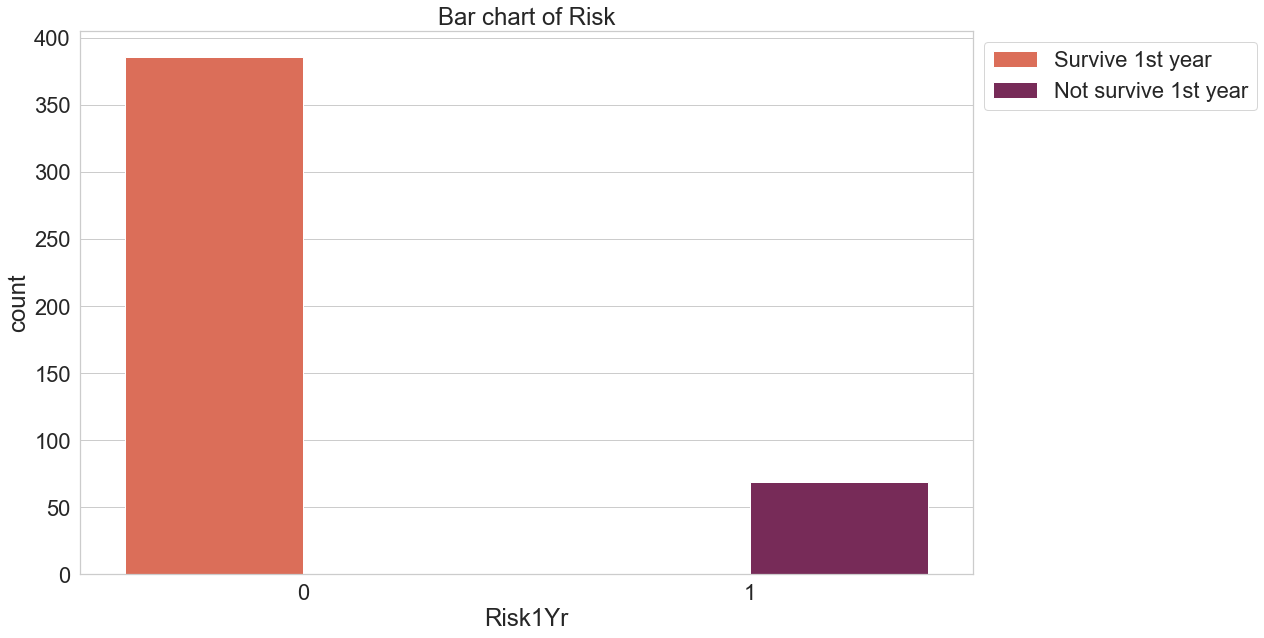

In [64]:
# this plot shows how many patients survived 1 year and how many did not after surgery
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,10))


sns.countplot(x="Risk1Yr", data=df2, hue = 'Risk1Yr', palette = 'rocket_r')

ax.set_title('Bar chart of Risk')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Survive 1st year', 'Not survive 1st year'], bbox_to_anchor=(1,1))


<p>The data size is small and the data is not well balanced.</p><br>
<p>Anyway, we will check what can be deduced from them.</p>

<p>DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)</p><br>

<p>We check which DGN code has the greatest impact on the patients</p> 

In [66]:
df2['DGN'].value_counts()

DGN3    341
DGN2     49
DGN4     45
DGN5     13
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

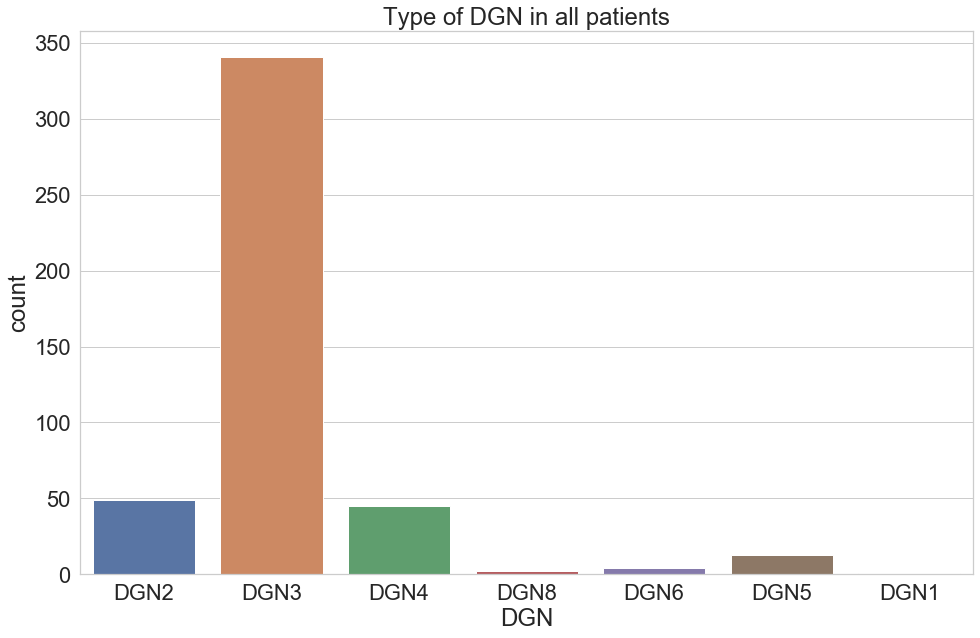

In [67]:
# this plot shows count of a given DGN in all patients
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title("Type of DGN in all patients")

sns.set(font_scale=2)
sns.countplot(x='DGN', data=df2)

<p>DGN3 is the most common code that was present in all patients.</p>

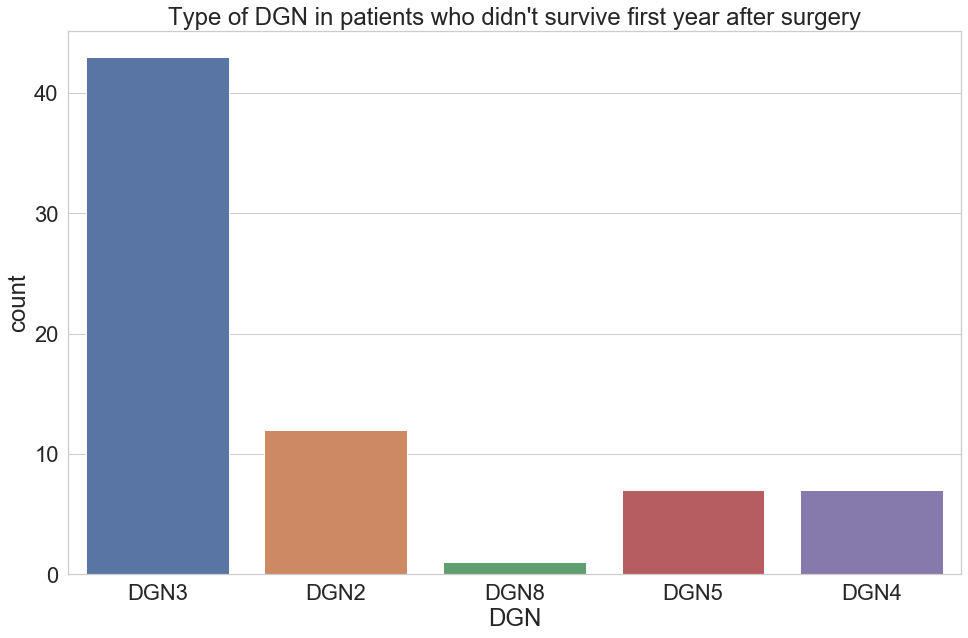

In [13]:
# this plot shows count of a given DGN in patients who didnt survive 1st year
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,10))
sns.set(font_scale=2)
ax.set_title("Type of DGN in patients who didn't survive first year after surgery")
sns.countplot(x='DGN', data= df2[df2['Risk1Yr'] == 1])

<p>DGN3 was the most common code that was present in all patients.</p>

<p>The trend is similar in patients who did not survive 1 year after surgery.</p>

<p>Ok, as you know smoking is bad for your health. Let's see if it had an effect on patients.</p>

[Text(0.5, 0, '(Risk1Yr, Smoker)')]

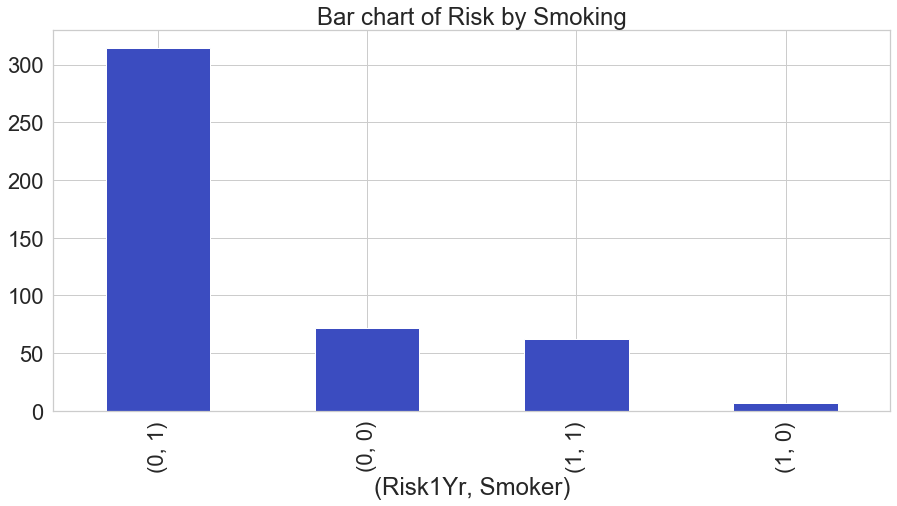

In [75]:
# This shows how many patients survived 1 year being a smoker (0,1)
# This shows how many patients survived 1 year without being a smoker (0,0)
# This shows how many patients did not survive 1 year being a smoker (1,1)
# This shows how many patients did not survive 1 year without being a smoker (1,0)

fig, ax = plt.subplots(figsize=(15,7))

# group patients by 'Risk1Yr', 
# taking into account the number of patients who was smokers (1) and was not smokers (0)
df2.groupby('Risk1Yr')['PRE30'].value_counts().plot(ax=ax, 
                                                    kind='bar', title = 'Bar chart of Risk by Smoking',
                                                   colormap = 'coolwarm')
ax.set(xlabel = "(Risk1Yr, Smoker)")

<p>Focusing on patients who did not survive 1 year after surgery, you can see that 90% of them were smokers.</p>

<p>Now let's look at the FVC (PRE4) parameter.</p><br>
<p>Forced vital capacity is the total amount of air that can be exhaled following a deep inhalation in an FVC test. Thenormal FVC range for an adult is between 3liters and 5liters.</p>

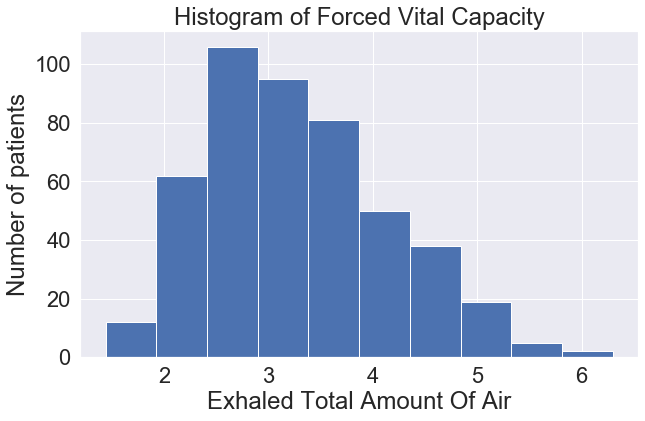

In [15]:
plt.figure(figsize=(10,6))
plt.hist(x=df2['PRE4'], bins = 10)

plt.xlabel('Exhaled Total Amount Of Air')
plt.ylabel('Number of patients')
plt.title('Histogram of Forced Vital Capacity')

plt.show()

In [16]:
# mean FVC
df2['PRE4'].mean()

3.2816382978723415

In [17]:
# Checking the age of the youngest patient
# He was adult
df2['AGE'].min()

21

In [18]:
# mean AGE
df2['AGE'].mean()

62.53404255319149

<p>The highest value of the FVC parameter oscillates between 2.5 - 4.

The patients mean FVC is 3.2, the lower end of the optimal range.</p>

<p>Next step</p><br>
<p>Checking FVC vs FEV1</p><br>

<p>The FEV1/FVC ratio is a measurement of the amount of air you can forcefully exhale from your lungs.</p>
<p>Decreased FVC With Proportional FEV1/FVC Ratio. <br> If your FVC is decreased but the ratio of FEV1/FVC is normal, this indicates a restrictive pattern. A normal ratio is 70% to 80% in adults, and 85% in children.</p>

<p><a href="https://www.verywellhealth.com/fev1fvc-ratio-of-fev1-to-fvc-spirometry-914783">SOURCE</a></p>

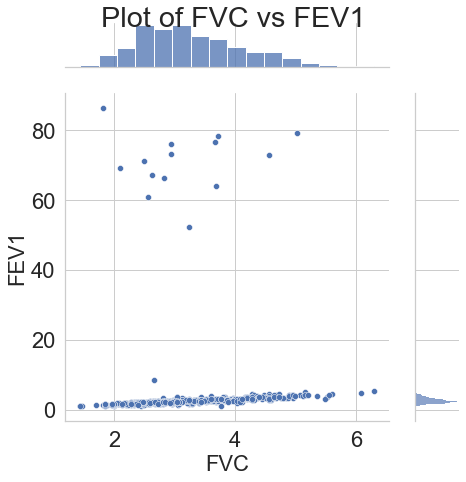

In [19]:
# Checking jointplot FVC vs FEV1 in all patietns
sns.set_style(style="whitegrid")

g = sns.jointplot(x='PRE4',y='PRE5',data=df2, kind='scatter', height = 7)
g.set_axis_labels('FVC', 'FEV1', fontsize=22)
g.fig.suptitle("Plot of FVC vs FEV1")
g.fig.tight_layout()

C:\Users\Dawid\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Plot of FVC vs FEV1')

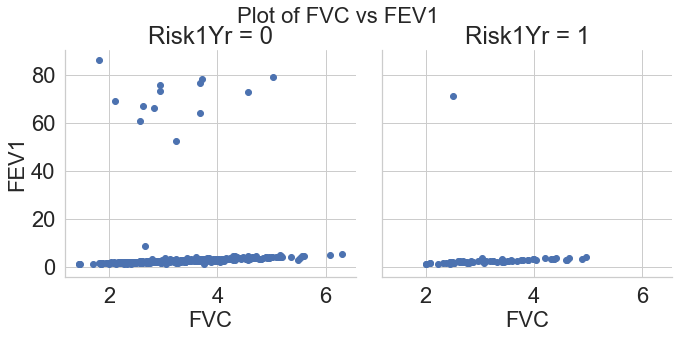

In [20]:
# Checking jointplot FVC vs FEV1 by Risk1Yr
sns.set_style(style="whitegrid")

g = sns.FacetGrid(col='Risk1Yr',data=df2, size = 5)
g.map(plt.scatter, 'PRE4', 'PRE5')
g.set_axis_labels('FVC', 'FEV1', fontsize=22)
g.fig.suptitle("Plot of FVC vs FEV1", fontsize=22)

In [21]:
# I add a new feature called 'RATIO' to the data frame. RATIO = FEV1 / FVC
df2['RATIO'] = df2['PRE5'] / df2['PRE4']

<p>In my opinion, the above charts showed that we have some anomalies in the data. (specifically 15 indexes)

Citing that data <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5849379/">source</a>. Ratio should not be greater than ~ 120%, and value of FEV1 (PRE5) should be ~ between 0.6 - 4.7 [ml]</p>

In [22]:
# looking for that 15 indexes
df2[df2['RATIO'] > 1.3]

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr,RATIO
25,26,DGN5,4.56,72.80,PRZ0,1,1,0,1,0,OC12,0,0,0,1,0,57,0,15.964912
89,90,DGN3,2.83,66.40,PRZ1,1,1,1,1,0,OC12,0,0,0,1,0,75,0,23.462898
98,99,DGN3,2.63,67.30,PRZ1,0,0,1,1,0,OC11,0,0,0,1,0,54,0,25.589354
112,113,DGN3,3.68,64.10,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,60,0,17.418478
132,133,DGN2,2.50,71.10,PRZ0,0,0,1,0,0,OC13,0,0,0,1,0,64,1,28.440000
215,216,DGN2,2.66,8.56,PRZ1,0,1,0,1,0,OC12,0,0,0,1,0,61,0,3.218045
255,256,DGN3,3.72,78.30,PRZ0,1,0,0,1,0,OC12,0,0,0,1,0,44,0,21.048387
319,320,DGN3,2.10,69.10,PRZ0,0,0,0,0,0,OC11,0,0,0,1,0,62,0,32.904762
325,326,DGN4,5.03,79.30,PRZ1,0,0,1,0,0,OC11,0,0,0,0,0,38,0,15.765408
330,331,DGN2,2.94,76.00,PRZ1,0,1,1,1,0,OC12,0,0,0,0,0,61,0,25.850340


In [23]:
# List of indexes I want to remove
my_l = list(df2[df2['RATIO'] > 1.3].index.values)

In [24]:
len(list(df2[df2['RATIO'] > 1.3].index.values))

15

In [25]:
len(df2)

470

In [26]:
df2 = df2.drop(my_l, axis=0)

In [27]:
len(df2)

455

In [28]:
# Checking after drop
df2[df2['RATIO'] > 1.3]

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr,RATIO


<p>Now I retry the chart again</p>

C:\Users\Dawid\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Plot of FVC vs FEV1')

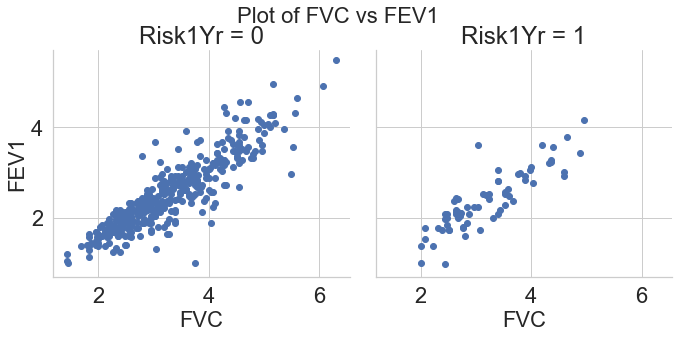

In [29]:
# Checking jointplot FVC vs FEV1 by Risk1Yr
# after dropped 15 indexes
sns.set_style(style="whitegrid")

g = sns.FacetGrid(col='Risk1Yr',data=df2, size = 5)
g.map(plt.scatter, 'PRE4', 'PRE5')
g.set_axis_labels('FVC', 'FEV1', fontsize=22)
g.fig.suptitle("Plot of FVC vs FEV1", fontsize=22)

<p>Ok now we can check mean ratio.</p>
<p>If your FVC is decreased but the ratio of FEV1/FVC is normal, this indicates a restrictive pattern.</p>
<p>A normal ratio is 70% to 80% in adults, and 85% in children.</p>
<p> <a target="_blank" href="https://www.verywellhealth.com/fev1fvc-ratio-of-fev1-to-fvc-spirometry-914783">More HERE</a></p>

([<matplotlib.axis.YTick at 0x9382365748>,
 <a list of 9 Text yticklabel objects>)

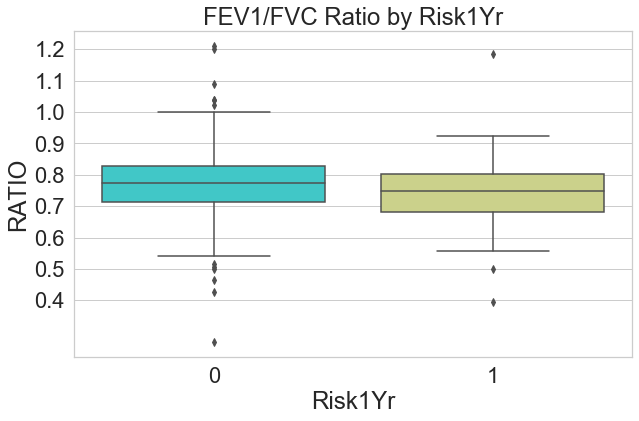

In [68]:
# FEV1 / FVC by Risk1Yr
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(x= 'Risk1Yr', y='RATIO',data=df2,palette='rainbow').set_title("FEV1/FVC Ratio by Risk1Yr")

plt.yticks(np.arange(0.4, 1.3, 0.1))

<p>Patients who did not survive 1 year after surgery had a lower mean ratio than those who survived, but they were still within the normal 70% - 80%.</p>

([<matplotlib.axis.YTick at 0x9383517f08>,
 <a list of 9 Text yticklabel objects>)

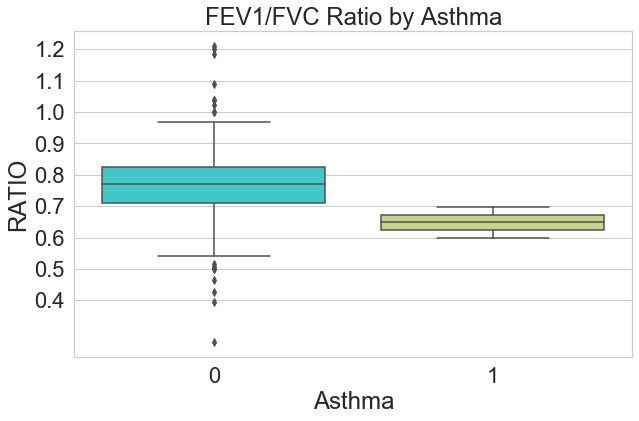

In [73]:
# FEV1 / FVC by Asthma
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(x= 'PRE32', y='RATIO',data=df2,palette='rainbow').set_title("FEV1/FVC Ratio by Asthma")

plt.xlabel('Asthma')
plt.yticks(np.arange(0.4, 1.3, 0.1))

In [74]:
df2['PRE32'].value_counts()

0    453
1      2
Name: PRE32, dtype: int64

<p>Asthma patients have FEV1 / FVC Ratio below 70%, but there were only two of them</p>

<p>Next step</p>
<p>PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)</p>

Text(0.5, 0, 'OC type')

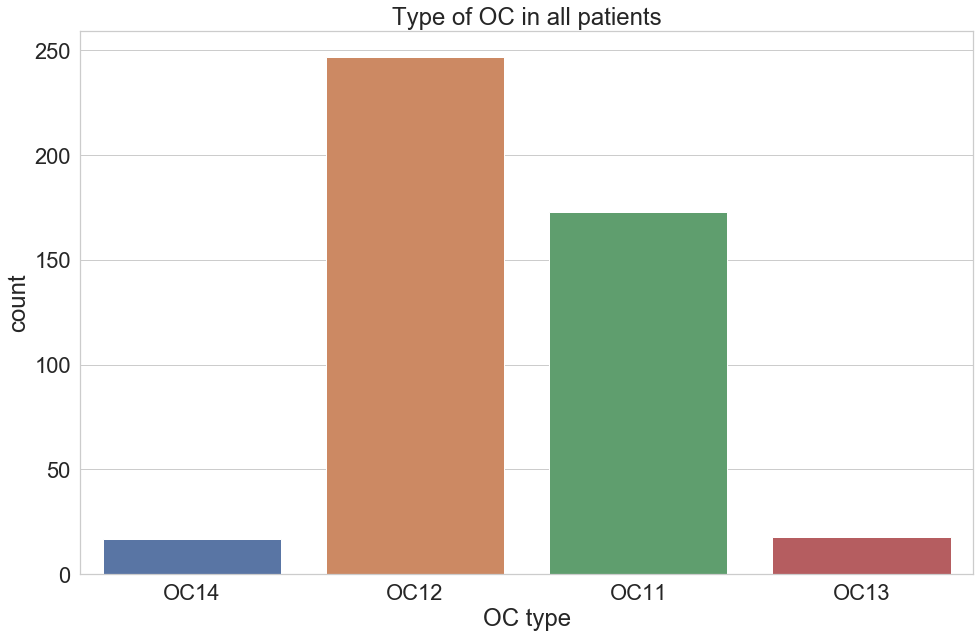

In [32]:
# this plot shows count of a given OC in all patients
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,10))
ax.set_title("Type of OC in all patients")

sns.set(font_scale=2)
sns.countplot(x= 'PRE14', data = df2)
ax.set_xlabel('OC type')

Text(0.5, 0, 'OC type')

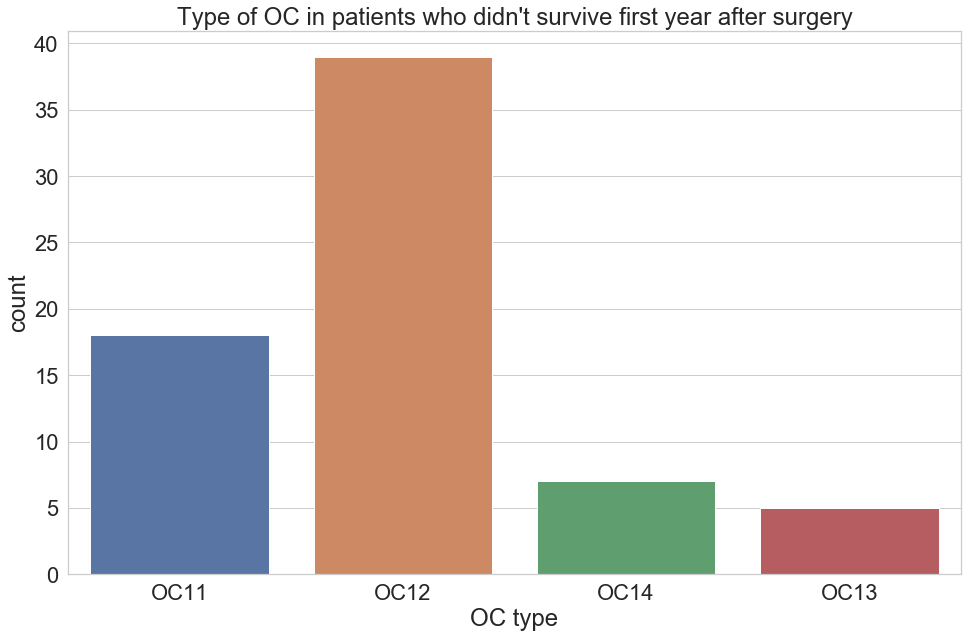

In [33]:
# this plot shows count of a given OC in patients who didnt survive 1st year
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(16,10))
sns.set(font_scale=2)
ax.set_title("Type of OC in patients who didn't survive first year after surgery")
sns.countplot(x= 'PRE14',  data =df2[df2['Risk1Yr'] == 1])
ax.set_xlabel('OC type')

<p>The data show that the majority of patients had a tumor classified as OC12 and OC11.</p>
<p>The trend is similar in patients who did not survive 1 year after surgery.</p>

<h5>Data preparation before modeling.</h5>

In [34]:
#### DGN, PRE6 and PRE14 are object dtypes, so I'll use get_dummies - one hot encoding
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 469
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       455 non-null    int64  
 1   DGN      455 non-null    object 
 2   PRE4     455 non-null    float64
 3   PRE5     455 non-null    float64
 4   PRE6     455 non-null    object 
 5   PRE7     455 non-null    int32  
 6   PRE8     455 non-null    int32  
 7   PRE9     455 non-null    int32  
 8   PRE10    455 non-null    int32  
 9   PRE11    455 non-null    int32  
 10  PRE14    455 non-null    object 
 11  PRE17    455 non-null    int32  
 12  PRE19    455 non-null    int32  
 13  PRE25    455 non-null    int32  
 14  PRE30    455 non-null    int32  
 15  PRE32    455 non-null    int32  
 16  AGE      455 non-null    int64  
 17  Risk1Yr  455 non-null    int32  
 18  RATIO    455 non-null    float64
dtypes: float64(3), int32(11), int64(2), object(3)
memory usage: 71.5+ KB


In [35]:
# first I remove ID column
df2 = df2.drop('id', axis = 1)

In [36]:
df2.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr,RATIO
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0,0.750000
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0,0.552941
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0,0.753623
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0,0.826087
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1,0.393443


In [37]:
# using get_dummies
# new data frame: df3
df3 = pd.get_dummies(df2, drop_first = False, columns = ['DGN', 'PRE6', 'PRE14'])

In [38]:
# no objcets now
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 469
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRE4        455 non-null    float64
 1   PRE5        455 non-null    float64
 2   PRE7        455 non-null    int32  
 3   PRE8        455 non-null    int32  
 4   PRE9        455 non-null    int32  
 5   PRE10       455 non-null    int32  
 6   PRE11       455 non-null    int32  
 7   PRE17       455 non-null    int32  
 8   PRE19       455 non-null    int32  
 9   PRE25       455 non-null    int32  
 10  PRE30       455 non-null    int32  
 11  PRE32       455 non-null    int32  
 12  AGE         455 non-null    int64  
 13  Risk1Yr     455 non-null    int32  
 14  RATIO       455 non-null    float64
 15  DGN_DGN1    455 non-null    uint8  
 16  DGN_DGN2    455 non-null    uint8  
 17  DGN_DGN3    455 non-null    uint8  
 18  DGN_DGN4    455 non-null    uint8  
 19  DGN_DGN5    455 non-null    u

In [39]:
# Find the correlation between our independent variables
corr_matrix = df3.corr()
corr_matrix

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC11,PRE14_OC12,PRE14_OC13,PRE14_OC14
PRE4,1.000000,0.887629,0.002314,-0.103153,0.070447,-0.063979,-0.104872,-0.119992,-0.009675,-0.036955,...,0.002601,0.083624,0.112415,0.091676,-0.059074,-0.054305,-0.051342,0.045967,0.014214,-0.003932
PRE5,0.887629,1.000000,0.012448,-0.158192,0.024821,-0.132661,-0.127682,-0.110765,-0.034142,-0.032711,...,-0.001654,0.070175,0.097807,0.122200,-0.075981,-0.077864,-0.027142,0.031581,-0.009747,-0.003461
PRE7,0.002314,0.012448,1.000000,0.225624,0.061907,-0.055571,-0.064880,0.034755,-0.016689,-0.033601,...,0.012763,-0.023654,-0.016689,-0.130120,0.094963,0.055036,-0.062585,-0.012271,0.187642,-0.000431
PRE8,-0.103153,-0.158192,0.225624,1.000000,0.101023,0.068715,0.074306,0.008942,-0.026392,0.093096,...,0.008789,-0.037406,-0.026392,-0.108571,0.056983,0.090047,-0.060358,0.055849,-0.014880,0.023089
PRE9,0.070447,0.024821,0.061907,0.101023,1.000000,0.076163,-0.058494,-0.031843,-0.016021,0.114513,...,0.016541,-0.022708,-0.016021,-0.079641,0.043890,0.061907,-0.109385,0.085741,0.099504,-0.047503
PRE10,-0.063979,-0.132661,-0.055571,0.068715,0.076163,1.000000,0.200394,0.025165,0.044069,0.016118,...,-0.029459,0.011346,-0.100185,-0.756329,0.639483,0.146385,-0.119418,0.052269,0.085648,0.080344
PRE11,-0.104872,-0.127682,-0.064880,0.074306,-0.058494,0.200394,1.000000,0.070334,0.057928,0.027890,...,0.062006,-0.042837,-0.030223,-0.273776,0.041967,0.428771,0.076196,-0.085956,-0.002564,0.033385
PRE17,-0.119992,-0.110765,0.034755,0.008942,-0.031843,0.025165,0.070334,1.000000,-0.018883,0.025578,...,0.051604,-0.026763,-0.018883,-0.057543,0.072425,-0.036000,-0.015969,0.009108,-0.057676,0.076231
PRE19,-0.009675,-0.034142,-0.016689,-0.026392,-0.016021,0.044069,0.057928,-0.018883,1.000000,-0.008889,...,-0.011395,-0.006258,-0.004415,-0.039993,0.046135,-0.016689,0.016395,-0.005716,-0.013485,-0.013090
PRE25,-0.036955,-0.032711,-0.033601,0.093096,0.114513,0.016118,0.027890,0.025578,-0.008889,1.000000,...,0.077433,-0.012599,-0.008889,-0.042673,0.057191,-0.033601,-0.001438,0.022059,-0.027151,-0.026356


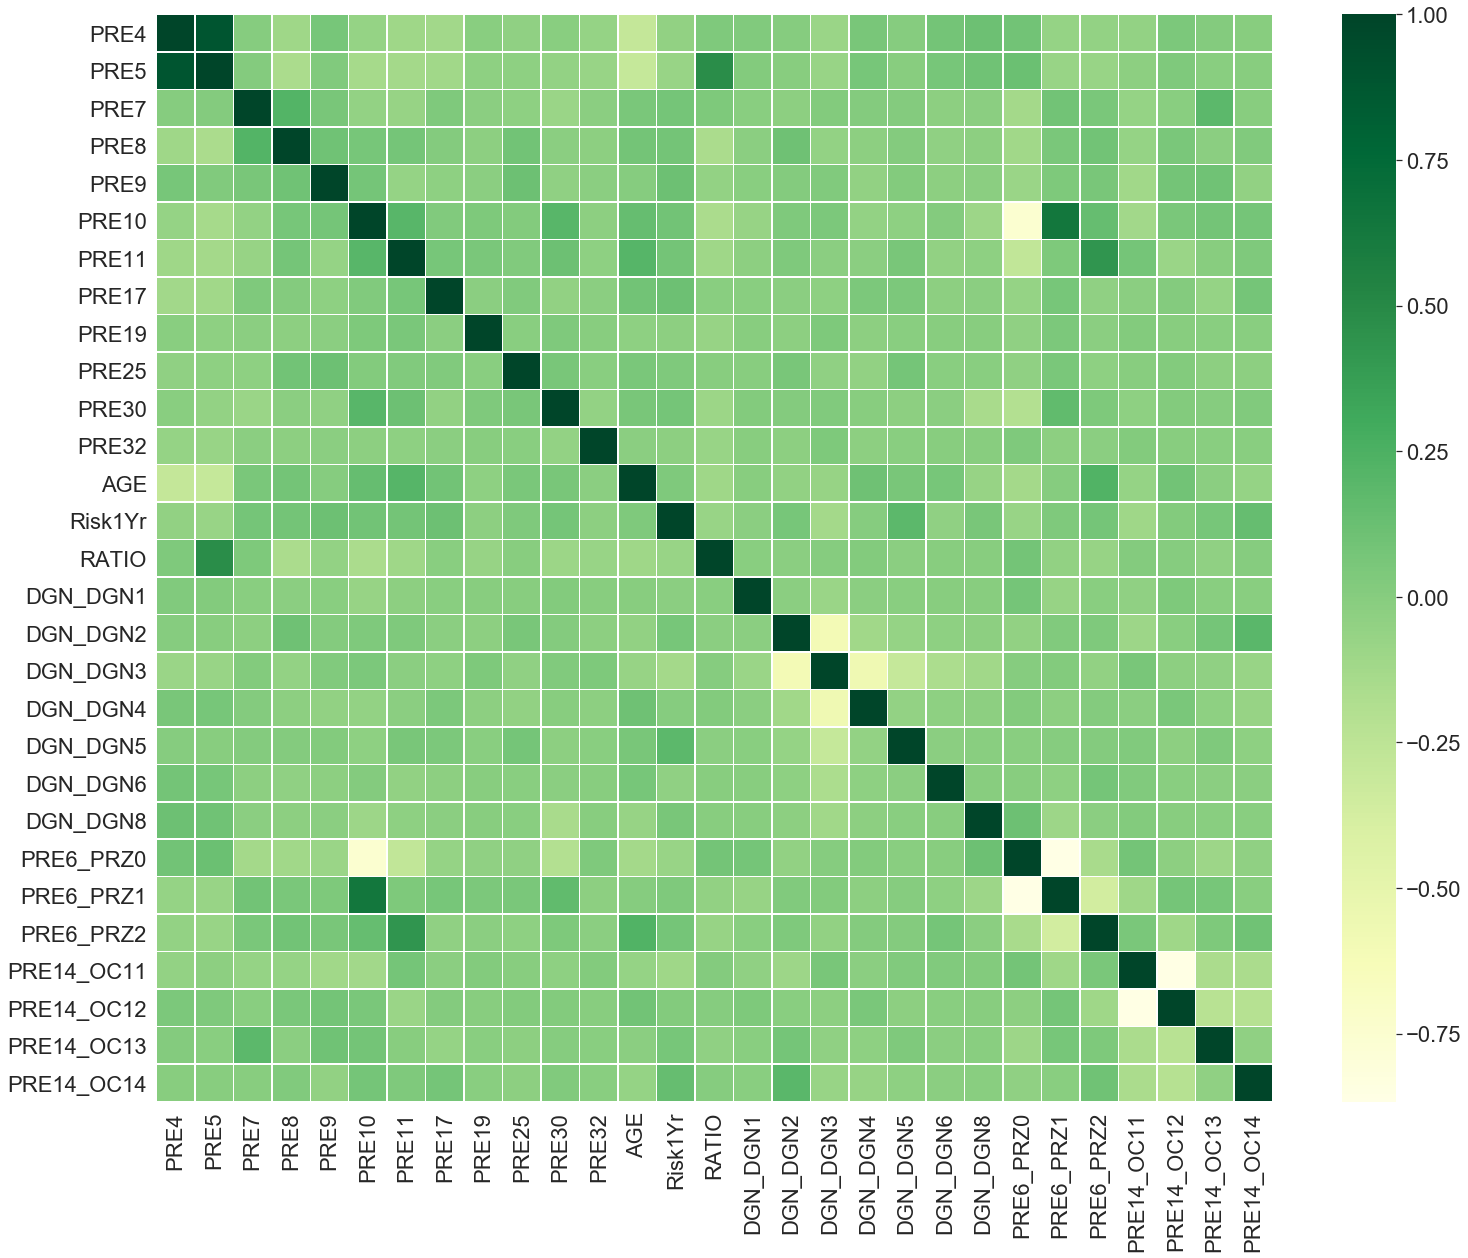

In [40]:
# Let's make it look a little prettier
corr_matrix = df3.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=False, linewidths=0.5, cmap="YlGn")

<h5>MODELING</h5>

In [41]:
df3.head()

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC11,PRE14_OC12,PRE14_OC13,PRE14_OC14
0,2.88,2.16,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3.40,1.88,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2.76,2.08,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,3.68,3.04,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2.44,0.96,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [42]:
X = df3.drop("Risk1Yr", axis=1)
y = df3['Risk1Yr']

In [43]:
# dataset is small and unbalanced: that's not good
y.value_counts()

0    386
1     69
Name: Risk1Yr, dtype: int64

In [44]:
# using SMOTE to take care of data
# MORE: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [45]:
# now the dataset is still small, but more balanced
y_sm.value_counts()

1    386
0    386
Name: Risk1Yr, dtype: int64

In [46]:
# making a dictionary in which we include three models with some parameters pre-set.
model_params = {
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1, 5, 10]
        }
    },
    
    'svm' : {
        'model' : SVC(gamma = 'auto'),
        'params' : {
            'C' : [0.1, 1, 10, 100],
            'kernel' : ["rbf", "linear"]
        }
    },
    
    'logistics_regression' : {
        'model' : LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C' : [0.1, 1, 10, 100]
        }
    }
}

In [47]:
# implement GridSearchCV for three models using a loop and a previously created dictionary
# in the created variable scores, we save best_score and best_params for each model
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_sm, y_sm)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [77]:
# making data frame
sc = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
sc

,model,best_score,best_params
0,random_forest,0.852501,{'n_estimators': 10}
1,svm,0.853817,"{'C': 10, 'kernel': 'rbf'}"
2,logistics_regression,0.812451,{'C': 100}


<p>Further, I focused on two models</p>

In [49]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state = 42)

<h4>SVM Model</h4>

In [50]:
# implementing SVC model with best_params
clf_svm = SVC(C = 100, kernel = 'rbf')
clf_svm.fit(X_train, y_train)

SVC(C=100)

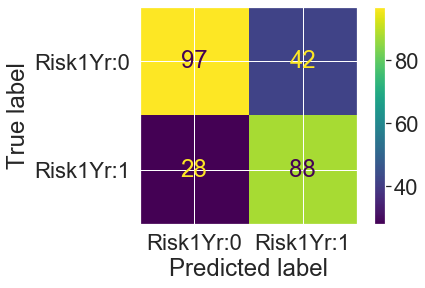

In [51]:
# confusion matrix SVC
plot_confusion_matrix(clf_svm,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels=['Risk1Yr:0', 'Risk1Yr:1'])

In [52]:
# Now predict values for the testing data
predictions_svm = clf_svm.predict(X_test)

In [53]:
# Create a classification report for the model SVC
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.78      0.70      0.73       139
           1       0.68      0.76      0.72       116

    accuracy                           0.73       255
   macro avg       0.73      0.73      0.73       255
weighted avg       0.73      0.73      0.73       255



<h4>Random Forest Classifier Model</h4>

In [54]:
# implementing RFC model with best_params
clf_rfc = RandomForestClassifier(n_estimators =  10)
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

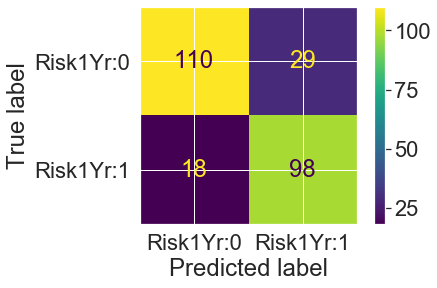

In [55]:
# confusion matrix RFC
plot_confusion_matrix(clf_rfc,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels=['Risk1Yr:0', 'Risk1Yr:1'])

In [56]:
# Create a classification report for the RFC model 
predictions_rfc = clf_rfc.predict(X_test)

In [57]:
# Create a classification report for the RFC model 
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       139
           1       0.77      0.84      0.81       116

    accuracy                           0.82       255
   macro avg       0.82      0.82      0.82       255
weighted avg       0.82      0.82      0.82       255



<h4>Cross Validation SVM<h4>

In [85]:
# Cross-validated accuracy score
cv_acc_svm = cross_val_score(clf_svm,
                         X_sm,
                         y_sm,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc_svm

array([0.55483871, 0.87096774, 0.87012987, 0.79220779, 0.83766234])

In [86]:
# accuracy mean
cv_acc_svm = np.mean(cv_acc_svm)
cv_acc_svm

0.7851612903225805

In [87]:
# Cross-validated precision score

cv_precision_svm = np.mean(cross_val_score(clf_svm,
                                       X_sm,
                                       y_sm,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
# precision mean
cv_precision_svm

0.8898941720446061

In [88]:
# Cross-validated recall score

cv_recall_svm = np.mean(cross_val_score(clf_svm,
                                    X_sm,
                                    y_sm,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
# recall mean
cv_recall_svm

0.6394605394605394

In [89]:
# Cross-validated F1 score
cv_f1_svm = np.mean(cross_val_score(clf_svm,
                                X_sm,
                                y_sm,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
# f1 score mean
cv_f1_svm

0.7085179756513469

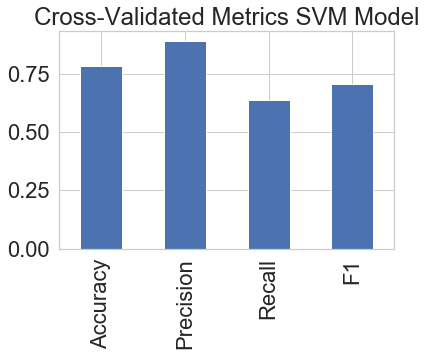

In [90]:
# Visualizing cross-validated metrics SVM Model
cv_metrics_svm = pd.DataFrame({"Accuracy": cv_acc_svm,
                            "Precision": cv_precision_svm,
                            "Recall": cv_recall_svm,
                            "F1": cv_f1_svm},
                          index=[0])
cv_metrics_svm.T.plot.bar(title="Cross-Validated Metrics SVM Model", legend=False);

<h4>Cross Validation RFC<h4>

In [91]:
# Cross-validated accuracy score
cv_acc_rfc = np.mean(cross_val_score(clf_rfc,
                         X_sm,
                         y_sm,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
# acc mean
cv_acc_rfc

0.8590448261416004

In [92]:
# Cross-validated precision score

cv_precision_rfc = np.mean(cross_val_score(clf_rfc,
                                       X_sm,
                                       y_sm,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
# precision mean
cv_precision_rfc

0.8783389450056116

In [93]:
# Cross-validated recall score

cv_recall_rfc = np.mean(cross_val_score(clf_rfc,
                                    X_sm,
                                    y_sm,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
# recall mean
cv_recall_rfc

0.8390942390942391

In [94]:
# Cross-validated F1 score
cv_f1_rfc = np.mean(cross_val_score(clf_rfc,
                                X_sm,
                                y_sm,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
# f1 score mean
cv_f1_rfc

0.8381548824578682

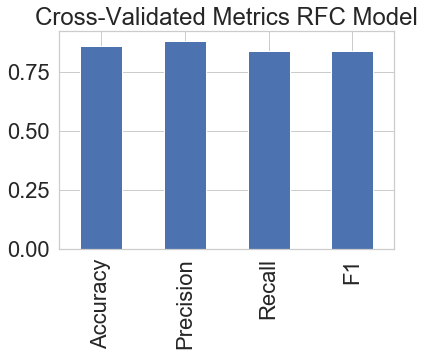

In [99]:
# Visualizing cross-validated metrics RFC Model
cv_metrics_rfc = pd.DataFrame({"Accuracy": cv_acc_rfc,
                            "Precision": cv_precision_rfc,
                            "Recall": cv_recall_rfc,
                            "F1": cv_f1_rfc},
                          index=[0])
cv_metrics_rfc.T.plot.bar(title="Cross-Validated Metrics RFC Model", legend=False);

<h5>Summary</h5>

In [147]:
# concat two dataframes cv_metrics_rfc and cv_metrics_svm
cv_metrics_rfc['Key'] = 'RFC'
cv_metrics_svm['Key'] = 'SVM'
df_summary = pd.concat([df_rfc,df_svm],keys=['RFC','SVM'])

Text(0.5, 0, 'Model Type')

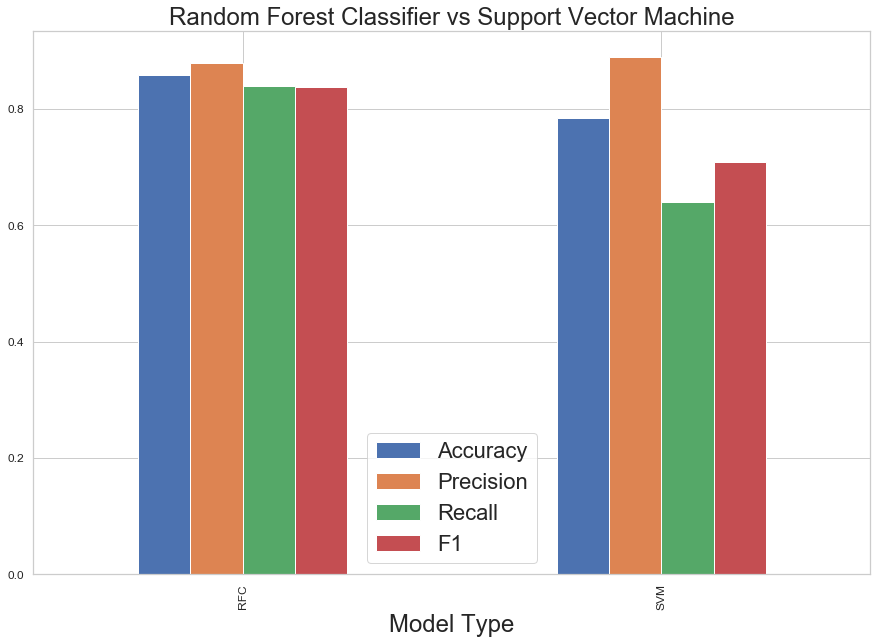

In [149]:
df_summary.plot.bar(x='Key', title='Random Forest Classifier vs Support Vector Machine', 
                    figsize=(15,10), fontsize=12).set_xlabel('Model Type')